In [152]:
import seaborn as sns
from scipy import stats

Se analizara el dataset en busqueda de valores nulos y duplicados para su correcion
Se analizara la tasa de supervivencia y mortalidad de los pasajeros del titanic segun su clase
Se hara un analisis de correlatividad entre el precio del ticket y la supervivencia

In [153]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [154]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Hay observaciones duplicadas en el dataset

In [155]:
titanic.duplicated().sum()

np.int64(107)

In [156]:
titanic.drop_duplicates(inplace=True)
titanic.duplicated().sum()

np.int64(0)

Hay observaciones a las cuales les falta la edad y el puerto de embarque (no vamos a tener en cuenta deck ya que se desconoce que representa en el dataset)

In [157]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

Vamos a completar ambas columnas con la media de la edad y la moda del puerto de embarque

In [158]:
female_mean_age = titanic[titanic['sex'] == 'female'].age.mean()
man_mean_age = titanic[titanic['sex'] == 'male'].age.mean()
mode_embarked = titanic.embarked.mode()[0]
mode_embark_town = titanic.embark_town.mode()[0]

print('edad promedio de mujeres', female_mean_age)
print('edad promedio de hombres', man_mean_age)
print('puerto de embarque mas comun', mode_embarked)
print('ciudad de embarque mas comun', mode_embark_town)

edad promedio de mujeres 27.9462890625
edad promedio de hombres 31.035947867298578
puerto de embarque mas comun S
ciudad de embarque mas comun Southampton


In [159]:
titanic.loc[(titanic['age'].isna()) & (titanic['sex'] == 'female'), 'age'] = female_mean_age
titanic.loc[(titanic['age'].isna()) & (titanic['sex'] == 'male'), 'age'] = man_mean_age

titanic['embarked'].fillna(mode_embarked, inplace=True)

titanic['embark_town'].fillna(mode_embark_town, inplace=True)

titanic.isnull().sum()

/var/folders/xr/8g60y89560j6qzlm3sgc1_jh0000gn/T/ipykernel_3681/859827898.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(mode_embarked, inplace=True)
/var/folders/xr/8g60y89560j6qzlm3sgc1_jh0000gn/T/ipykernel_3681/859827898.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           582
embark_town      0
alive            0
alone            0
dtype: int64

<Axes: xlabel='survived', ylabel='count'>

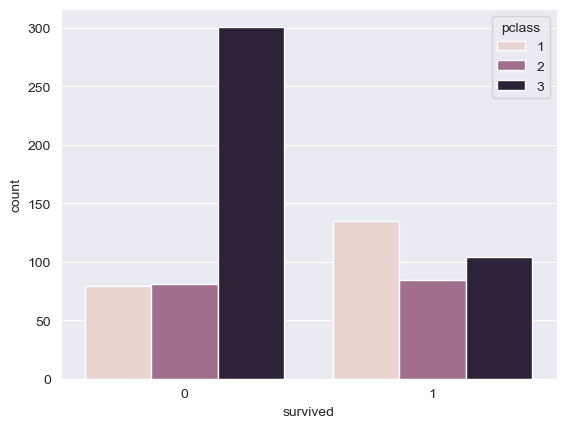

In [160]:
sns.countplot(x='survived', hue='pclass', data=titanic)

In [161]:
survived = titanic.survived.groupby(titanic.pclass).sum()
survived_first_proportion = survived[1] / survived.sum()
survived_second_proportion = survived[2] / survived.sum()
survived_third_proportion = survived[3] / survived.sum()

print("primera clase", survived_first_proportion)
print("segunda clase", survived_second_proportion)
print("tercera clase", survived_third_proportion)

primera clase 0.4179566563467492
segunda clase 0.26006191950464397
tercera clase 0.3219814241486068


In [162]:
dead = titanic.survived.groupby(titanic.pclass).count() - survived
dead_first_proportion = dead[1] / dead.sum()
dead_second_proportion = dead[2] / dead.sum()
dead_third_proportion = dead[3] / dead.sum()

print("primera clase", dead_first_proportion)
print("segunda clase", dead_second_proportion)
print("tercera clase", dead_third_proportion)

primera clase 0.17136659436008678
segunda clase 0.175704989154013
tercera clase 0.6529284164859002


Se ve claramente que la clase 1 tiene mayor tasa de supervivencia y que la clase 3 tiene mayor tasa de mortalidad 

<Axes: xlabel='fare', ylabel='survived'>

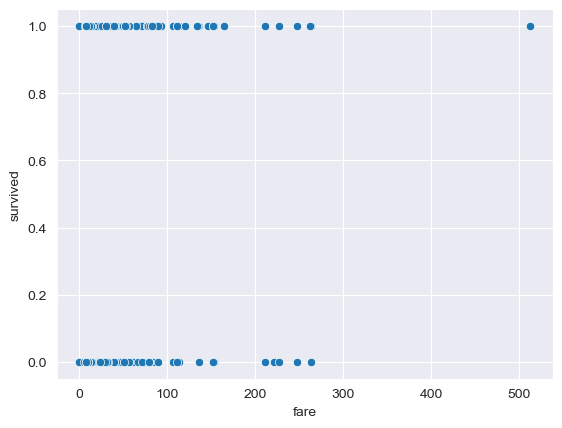

In [163]:
sns.scatterplot(x='fare', y='survived', data=titanic)

Se ve que no hay una correlacion clara entre el precio del ticket y la supervivencia

In [164]:
corr, _ = stats.pearsonr(titanic['fare'], titanic['survived'])

print('Correlación de Pearson:', corr)

Correlación de Pearson: 0.24676903154258573


Vemos que el valor de la correlacion de Pearson es muy bajo, por lo que no hay una correlacion clara entre el precio del ticket y la supervivencia